## **PREPROCESSING**

In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/drive/MyDrive/Files/'

train_data = pd.read_csv(file_path + 'train_data.csv')

test_data = pd.read_csv(file_path + 'test_data.csv')

In [ ]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (5, 5))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

In [ ]:
def data_heatmap(df):
    plt.figure(figsize = (10, 10))
    corr = df.corr()

    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap = 'magma', annot = True, fmt = '.2f')

    # Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns)

    # Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)

    # show plot
    plt.show()
    fig.show()

In [ ]:
def data_confusionmatrix(test, predicted):
    cm = confusion_matrix(test, predicted)
    sns.heatmap(cm, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

No of Rows :  245725
No of Coloums :  11
**************************************************
Colums Names : 
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object
**************************************************
Missing Values : 
Credit_Product    29325
dtype: int64
**************************************************
Missing vaules %age wise :

ID                      0.000000
Gender                  0.000000
Age                     0.000000


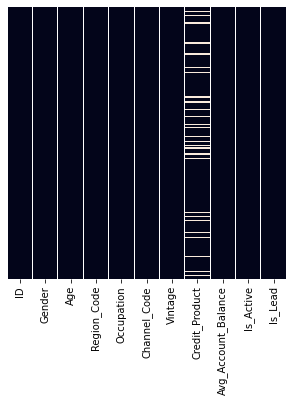

In [ ]:
data_investigate(train_data)

In [ ]:
train_data = train_data.fillna('Yes')
train_data.dropna(how = 'any', inplace = True)
train_data.drop_duplicates(inplace = True)

No of Rows :  245725
No of Coloums :  11
**************************************************
Colums Names : 
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object
**************************************************
Missing Values : 
Series([], dtype: int64)
**************************************************
Missing vaules %age wise :

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occ

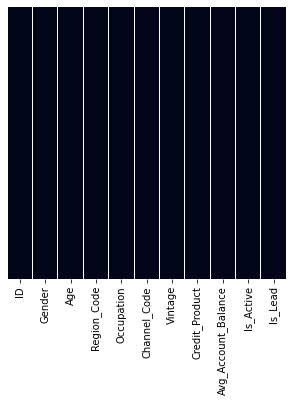

In [ ]:
data_investigate(train_data)

In [ ]:
train = LabelEncoder()

In [ ]:
train_data['Gender_T'] = train.fit_transform(train_data['Gender'])
train_data['Occupation_T'] = train.fit_transform(train_data['Occupation'])
train_data['Channel_Code_T'] = train.fit_transform(train_data['Channel_Code'])
train_data['Credit_Product_T'] = train.fit_transform(train_data['Credit_Product'])
train_data['Is_Active_T'] = train.fit_transform(train_data['Is_Active'])

In [ ]:
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Gender_T,Occupation_T,Channel_Code_T,Credit_Product_T,Is_Active_T
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0,1,2,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0,2,0,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0,3,2,0,1
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,1,2,0,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Yes,1925586,No,0,1,3,2,1,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,1,2,0,0,1
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,0,2,0,0,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0,0,2,0,0,0


In [ ]:
train_data_input = train_data[['Gender_T', 'Occupation_T', 'Channel_Code_T', 'Vintage', 'Credit_Product_T', 'Avg_Account_Balance', 'Is_Active_T']]
train_data_input

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
0,0,1,2,43,0,1045696,0
1,0,2,0,32,0,581988,0
2,0,3,2,26,0,1484315,1
3,1,2,0,19,0,470454,0
4,0,2,0,33,0,886787,0
...,...,...,...,...,...,...,...
245720,1,3,2,109,1,1925586,0
245721,1,2,0,15,0,862952,1
245722,0,2,0,13,0,670659,0
245723,0,2,0,31,0,407504,0


In [ ]:
train_data_input.describe()

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
count,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,0.546127,2.103282,0.902867,46.959141,0.412526,1.128403e+06,0.388381
std,0.497869,0.853751,0.884840,32.353136,0.492290,8.529364e+05,0.487383
min,0.000000,0.000000,0.000000,7.000000,0.000000,2.079000e+04,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,6.043100e+05,0.000000
50%,1.000000,2.000000,1.000000,32.000000,0.000000,8.946010e+05,0.000000
75%,1.000000,3.000000,2.000000,73.000000,1.000000,1.366666e+06,1.000000
max,1.000000,3.000000,3.000000,135.000000,1.000000,1.035201e+07,1.000000


In [ ]:
train_data_input.corr()

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
Gender_T,1.000000,0.031536,0.150586,0.146380,0.077313,0.022477,0.064207
Occupation_T,0.031536,1.000000,0.123937,0.027156,0.017734,-0.038496,0.077208
Channel_Code_T,0.150586,0.123937,1.000000,0.537852,0.304308,0.099911,0.249655
Vintage,0.146380,0.027156,0.537852,1.000000,0.235752,0.167433,0.209356
Credit_Product_T,0.077313,0.017734,0.304308,0.235752,1.000000,0.070495,-0.059762
Avg_Account_Balance,0.022477,-0.038496,0.099911,0.167433,0.070495,1.000000,0.076637
Is_Active_T,0.064207,0.077208,0.249655,0.209356,-0.059762,0.076637,1.000000


<Figure size 720x720 with 0 Axes>

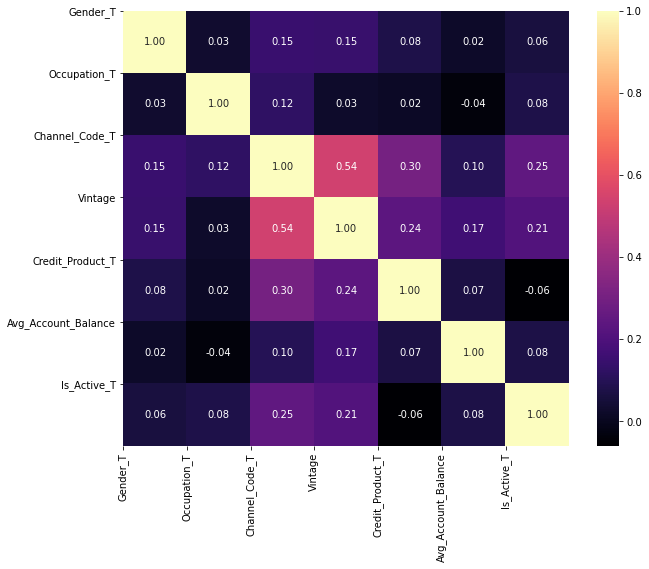

In [ ]:
data_heatmap(train_data_input)

In [ ]:
target_data = train_data['Is_Lead']
target_data

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

No of Rows :  105312
No of Coloums :  10
**************************************************
Colums Names : 
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object
**************************************************
Missing Values : 
Credit_Product    12522
dtype: int64
**************************************************
Missing vaules %age wise :

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation     

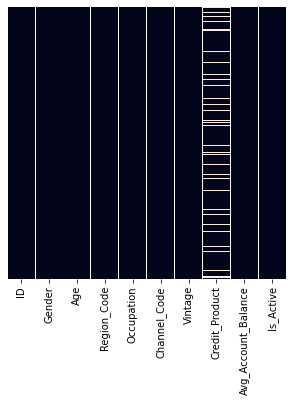

In [ ]:
data_investigate(test_data)

In [ ]:
test_data = test_data.fillna('Yes')
test_data.dropna(how = 'any', inplace = True)
test_data.drop_duplicates(inplace = True)

No of Rows :  105312
No of Coloums :  10
**************************************************
Colums Names : 
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object
**************************************************
Missing Values : 
Series([], dtype: int64)
**************************************************
Missing vaules %age wise :

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0

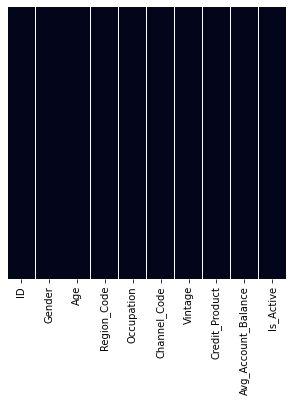

In [ ]:
data_investigate(test_data)

In [ ]:
test = LabelEncoder()

In [ ]:
test_data['Gender_T'] = test.fit_transform(test_data['Gender'])
test_data['Occupation_T'] = test.fit_transform(test_data['Occupation'])
test_data['Channel_Code_T'] = test.fit_transform(test_data['Channel_Code'])
test_data['Credit_Product_T'] = test.fit_transform(test_data['Credit_Product'])
test_data['Is_Active_T'] = test.fit_transform(test_data['Is_Active'])

In [ ]:
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Gender_T,Occupation_T,Channel_Code_T,Credit_Product_T,Is_Active_T
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1,1,0,1,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Yes,925537,No,1,1,1,1,0
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,1,2,0,0,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,1,1,0,0,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,1,2,1,1,1
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,1,1,1,1,0
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,1,2,3,0,0
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,1,1,2,0,1


In [ ]:
test_data_input = test_data[['Gender_T', 'Occupation_T', 'Channel_Code_T', 'Vintage', 'Credit_Product_T', 'Avg_Account_Balance', 'Is_Active_T']]
test_data_input

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
0,1,1,0,25,1,742366,0
1,1,1,1,49,1,925537,0
2,1,2,0,14,0,215949,0
3,1,1,0,33,0,868070,0
4,0,1,0,19,0,657087,0
...,...,...,...,...,...,...,...
105307,1,2,1,86,1,4242558,1
105308,1,1,1,86,1,1159153,0
105309,1,2,3,15,0,1703727,0
105310,1,1,2,93,0,737178,1


In [ ]:
test_data_input.describe()

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
count,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,1.053120e+05,105312.000000
mean,0.547943,2.103587,0.900781,46.842819,0.414995,1.134195e+06,0.394210
std,0.497698,0.852286,0.883744,32.273634,0.492724,8.662430e+05,0.488683
min,0.000000,0.000000,0.000000,7.000000,0.000000,2.259700e+04,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,6.039822e+05,0.000000
50%,1.000000,2.000000,1.000000,32.000000,0.000000,8.966345e+05,0.000000
75%,1.000000,3.000000,2.000000,73.000000,1.000000,1.371598e+06,1.000000
max,1.000000,3.000000,3.000000,135.000000,1.000000,9.908858e+06,1.000000


In [ ]:
test_data_input.corr()

,Gender_T,Occupation_T,Channel_Code_T,Vintage,Credit_Product_T,Avg_Account_Balance,Is_Active_T
Gender_T,1.000000,0.028172,0.150226,0.145817,0.081420,0.025798,0.069032
Occupation_T,0.028172,1.000000,0.124109,0.033178,0.019985,-0.038850,0.076936
Channel_Code_T,0.150226,0.124109,1.000000,0.534827,0.297018,0.095785,0.251515
Vintage,0.145817,0.033178,0.534827,1.000000,0.237484,0.164756,0.214084
Credit_Product_T,0.081420,0.019985,0.297018,0.237484,1.000000,0.062668,-0.061857
Avg_Account_Balance,0.025798,-0.038850,0.095785,0.164756,0.062668,1.000000,0.074181
Is_Active_T,0.069032,0.076936,0.251515,0.214084,-0.061857,0.074181,1.000000


<Figure size 720x720 with 0 Axes>

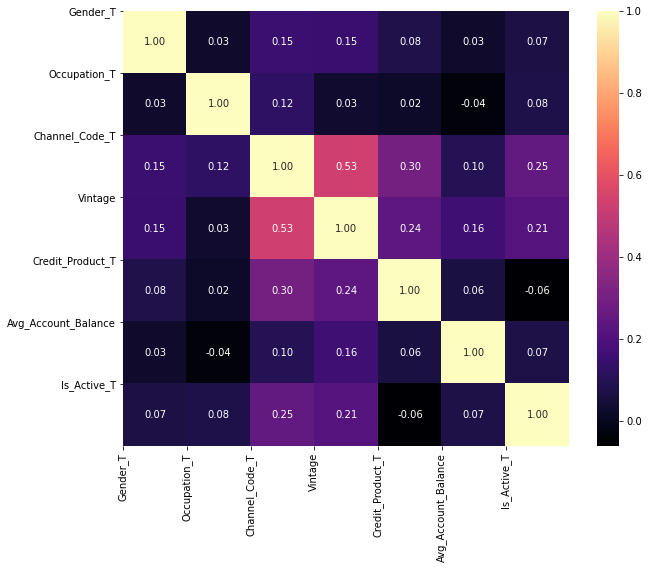

In [ ]:
data_heatmap(test_data_input)

## **TRAIN & TEST**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data_input, target_data, test_size = 0.3)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_accuracy = model.score(x_test, y_test)
print('Model Accuracy : ', model_accuracy * 100)

Model Accuracy :  77.01511164166148


In [ ]:
y_predicted = model.predict(x_test)

model_prediction = model.predict(test_data_input)
model_prediction

array([0, 0, 0, ..., 0, 0, 0])

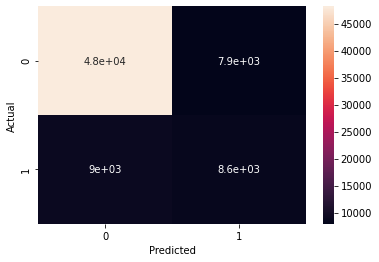

In [ ]:
data_confusionmatrix(y_test, y_predicted)

## **CSV**

In [ ]:
ID = test_data['ID']

In [ ]:
df = pd.DataFrame(data = {'ID': ID, 'Is_Lead': model_prediction})
df

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [ ]:
df.to_csv(file_path + 'final_predicted_data.csv', index = False)

In [ ]:
predicted_data = pd.read_csv(file_path + 'final_predicted_data.csv')

No of Rows :  105312
No of Coloums :  2
**************************************************
Colums Names : 
 Index(['ID', 'Is_Lead'], dtype='object')
**************************************************
Datatype of Columns : 
 ID         object
Is_Lead     int64
dtype: object
**************************************************
Missing Values : 
Series([], dtype: int64)
**************************************************
Missing vaules %age wise :

ID         0.0
Is_Lead    0.0
dtype: float64
**************************************************
Pictorial Representation : 


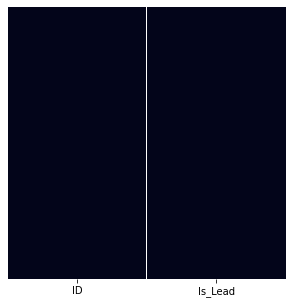

In [ ]:
data_investigate(predicted_data)

In [ ]:
predicted_data.Is_Lead.unique()

array([0, 1])

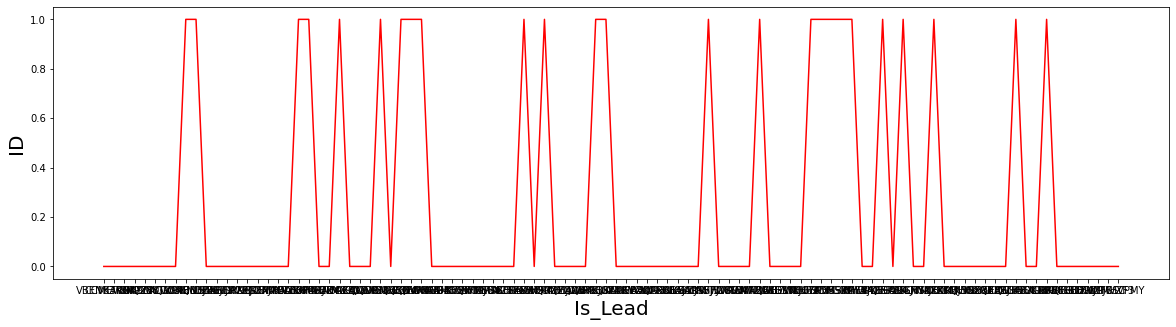

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(y = predicted_data['Is_Lead'][:100], x = predicted_data['ID'][:100], color = 'red')
plt.xlabel('Is_Lead', fontsize = 20)
plt.ylabel('ID', fontsize = 20)
plt.show()